In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook

## Read JPG Image 

In [2]:
from PIL import Image
jpgfile = Image.open("./data/c12-85h_xcr.jpg")

print jpgfile.bits, jpgfile.size, jpgfile.format

8 (1024, 1024) JPEG


## Read and parse .xcr file image 

In [3]:
f=open('./data/c12-85h.xcr','r')
header=f.readline()
identifier_h='\x00'*51+'1'+'\x00'*31
ind=header.find(identifier_h)
h=header[ind+83:ind+87]
w=header[ind+87+12:ind+87+16]
print 'Height,Width {},{}'.format(h,w)

Height,Width 1024,1024


In [4]:
from lib.helpersmd import readFromDat
S=256
w, h = 1024, 1024
# read xcr file with unsigned short values
dt = np.dtype('>H')
xcrfile=readFromDat('./data/c12-85h.xcr',dt)
xcrfile=xcrfile[1024:-4096]
# make all values in range 0..S
xcrfile=S*((xcrfile-xcrfile.min())/float(xcrfile.max()-xcrfile.min()))
xcrfile=np.floor(xcrfile)

xcrfile=xcrfile.reshape(w,h)
xcrfile=xcrfile[::-1]
img = Image.fromarray(xcrfile)

<IPython.core.display.Javascript object>


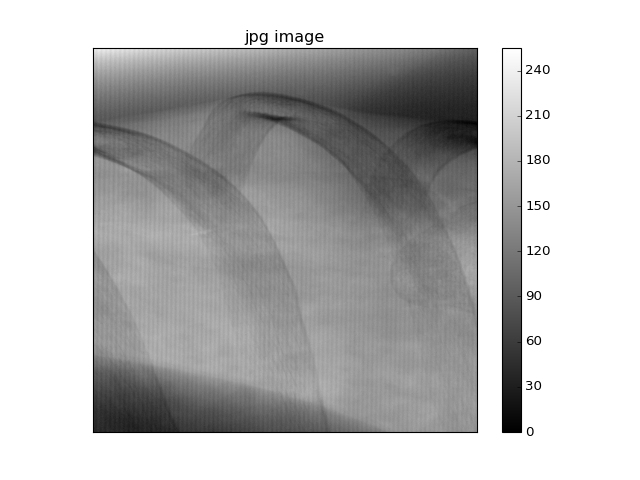

In [5]:
plt.figure("JPG")
plt.imshow(jpgfile,cmap='gray')
plt.xticks([]);plt.yticks([])
plt.title("jpg image")
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


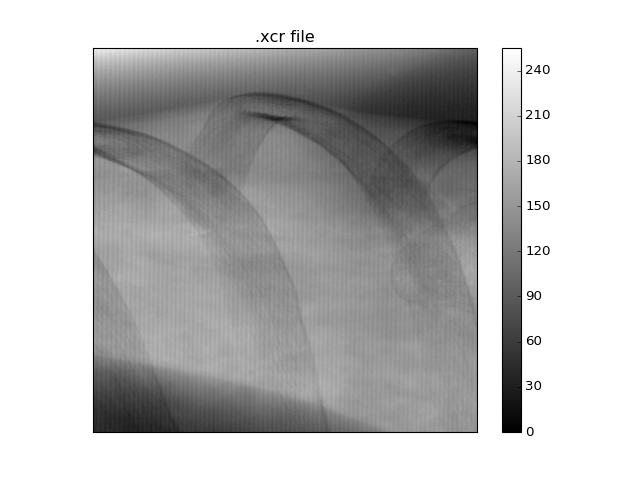

In [6]:
plt.figure(".xcr file")
plt.imshow(img,cmap='gray')
plt.title(".xcr file")
plt.xticks([]);plt.yticks([])
plt.colorbar()
plt.show()